**Комментарий ревьюера**

Георгий, привет! Меня зовут Сергей Волков, я буду проверять твой проект. Если не против, давай общаться на «ты». Если это неудобно, дай знать, перейдем на «вы».

У тебя уже проделана очень большая работа над проектом, но давай сделаем его еще лучше. Дальше ты найдешь мои комментарии — пожалуйста, не перемещай и не удаляй их. Буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌красный текст - так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️оранжевый текст - есть рекомендации, на что стоит обратить внимание. Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️зеленый текст - все отлично.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

<div class="alert alert-info"> <b>Комментарий студента V2:</b> Я очень много переделал в этой работе поэтому какие-то коментарии были смещены</div>



<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Георгий, привет! Повторные комментарии отмечены v.2</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️Георгий,снова привет!) Повторные комментарии отмечены v.3</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Здорово что вместе с названием есть краткое описание и ход исследования проекта!.</div>

## Подготовка данных

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> ✔️Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе. Круто что ислозуется try except при загрузке данных 👍🏼.</div>

### Анализ данных

In [2]:
df = pd.read_csv('/datasets/autos.csv')

display(df)
df.info()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [3]:
# Посмотрим общее распределение:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️Что можно сразу сказать, посмотрев на это распределение в первых трех колонках. </div>


<div class="alert alert-info">
<b> Комментарий студента V2:</b> Я так понял, что минимальная цена и минимальная мощность не может быть равна 0. Также год регистрации не может быть равен 1000.  
</div>

In [4]:
df.select_dtypes(['object'])

,DateCrawled,VehicleType,Gearbox,Model,FuelType,Brand,NotRepaired,DateCreated,LastSeen
0,2016-03-24 11:52:17,NaN,manual,golf,petrol,volkswagen,NaN,2016-03-24 00:00:00,2016-04-07 03:16:57
1,2016-03-24 10:58:45,coupe,manual,NaN,gasoline,audi,yes,2016-03-24 00:00:00,2016-04-07 01:46:50
2,2016-03-14 12:52:21,suv,auto,grand,gasoline,jeep,NaN,2016-03-14 00:00:00,2016-04-05 12:47:46
3,2016-03-17 16:54:04,small,manual,golf,petrol,volkswagen,no,2016-03-17 00:00:00,2016-03-17 17:40:17
4,2016-03-31 17:25:20,small,manual,fabia,gasoline,skoda,no,2016-03-31 00:00:00,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,NaN,manual,colt,petrol,mitsubishi,yes,2016-03-21 00:00:00,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,NaN,NaN,NaN,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,convertible,auto,fortwo,petrol,smart,no,2016-03-05 00:00:00,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,bus,manual,transporter,gasoline,volkswagen,no,2016-03-19 00:00:00,2016-04-07 07:15:26


In [5]:
# посмотрим сколько пустых значений
df.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [6]:
# посмотрим корреляцию
df.corr()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Kilometer,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


**Вывод**<br>
Из общего распределения можно увидеть, что:
- В столбцах `'Price', 'Power'`  минимальное значение равняется 0, что очень не логично, нужно построить boxplot, гистограмму, чтобы посмотреть распределение
- В столбце `'RegistrationYear'` минимальное значение равняется 1000, что не возвожно.
- Столбцы `'RegistrationMonth', 'NumberOfPictures', 'PostalCode'` нам не интересны, поэтому их мы не будем редактировать.
- Столбец `'NotRepaired'` имеет два уникальных значения: `yes, no`. Можно заменить на 1, 0
- Присутствую пропуски в 4 столбцах: `VehicleType, Gearbox, Model, NotRepaired`. Нужно просмотреть распределение там и по возможность заполнить пропуски.
- Корреляция между признаками слабая.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера:</b> ✔️Хорошо, данные загружены. Есть первичный осмотр данных.</div>

### Обработка данных
Начнём редактирование данных для машинного обучения. Для этого создадим DataFrame `data`

Оставим признаки которые нам понадобятся при обучении модели.<br>
Из всех признаков:
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMonth` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `NotRepaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя
- `Price` — цена (евро)


Оставляем:
- `Brand` — марка автомобиля
- `Model` — модель автомобиля
- `VehicleType` — тип автомобильного кузова
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `FuelType` — тип топлива
- `RegistrationYear` — год регистрации автомобиля
- `Kilometer` — пробег (км)
- `NotRepaired` — была машина в ремонте или нет
- `Price` — цена (евро) 

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌Год регистрации, важный для нас признак, даже чисто интуитивно, можно сделать вывод, что чем новей машина тем она дороже. </div>

<div class="alert alert-info">
    <b> Комментарий студента V2:</b> Добавил год регистрации
    
</div>

In [7]:
data = df[[
    'Brand',
    'Model',
    'VehicleType',
    'Gearbox',
    'Power',
    'FuelType',
    'RegistrationYear',
    'Kilometer',
    'NotRepaired',
    'Price'
]]

data.shape

(354369, 10)

In [8]:
# Проверим на наличие дубликатов
data.duplicated().sum()

45040

In [9]:
# Удалим их
data = data.drop_duplicates()

---

#### Ограничения

Посмотрим распределение и уберём выбросы

In [10]:
data.head()

,Brand,Model,VehicleType,Gearbox,Power,FuelType,RegistrationYear,Kilometer,NotRepaired,Price
0,volkswagen,golf,NaN,manual,0,petrol,1993,150000,NaN,480
1,audi,NaN,coupe,manual,190,gasoline,2011,125000,yes,18300
2,jeep,grand,suv,auto,163,gasoline,2004,125000,NaN,9800
3,volkswagen,golf,small,manual,75,petrol,2001,150000,no,1500
4,skoda,fabia,small,manual,69,gasoline,2008,90000,no,3600


In [11]:
data.describe()

,Power,RegistrationYear,Kilometer,Price
count,309329.000000,309329.000000,309329.000000,309329.000000
mean,110.976908,2004.360105,127217.735809,4486.937196
std,200.969473,92.541399,38532.941010,4564.852796
min,0.000000,1000.000000,5000.000000,0.000000
25%,69.000000,1999.000000,125000.000000,1100.000000
50%,105.000000,2003.000000,150000.000000,2800.000000
75%,143.000000,2008.000000,150000.000000,6500.000000
max,20000.000000,9999.000000,150000.000000,20000.000000


**RegistrationYear**

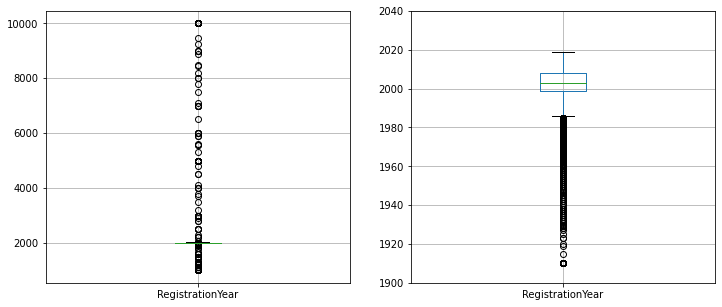

In [12]:
# распределение в столбце RegistrationYear
fig, axes = plt.subplots(1, 2, figsize = (12,5))

plt.subplot(1,2,1)
data.boxplot(column='RegistrationYear')

plt.subplot(1,2,2)
data.boxplot(column='RegistrationYear')
plt.ylim(1900, 2040)

plt.show()

In [13]:
# посмотрим с 1900 по 2040
data[(data['RegistrationYear'] >=1900) & (data['RegistrationYear'] <= 2022)].sort_values(by='RegistrationYear')

,Brand,Model,VehicleType,Gearbox,Power,FuelType,RegistrationYear,Kilometer,NotRepaired,Price
48958,opel,agila,small,manual,0,NaN,1910,5000,yes,600
318111,volkswagen,golf,NaN,NaN,0,NaN,1910,125000,NaN,1
82829,opel,corsa,NaN,NaN,0,NaN,1910,150000,NaN,500
78374,audi,NaN,other,NaN,0,NaN,1910,5000,NaN,250
200148,audi,a4,NaN,NaN,0,NaN,1910,150000,NaN,0
...,...,...,...,...,...,...,...,...,...,...
61345,hyundai,i_reihe,NaN,NaN,0,gasoline,2019,30000,no,19490
178620,volkswagen,polo,NaN,manual,90,petrol,2019,5000,no,15500
126686,bmw,5er,NaN,manual,1,NaN,2019,150000,NaN,0
62996,volkswagen,passat,NaN,auto,170,NaN,2019,150000,no,7900


Можно сделать вывод, что данные были введены неправильно, поэтому ограничим годы с 1985 по 2022:

In [14]:
data = data[(data['RegistrationYear'] >= 1985) & (data['RegistrationYear'] <= 2022)]

**Power**

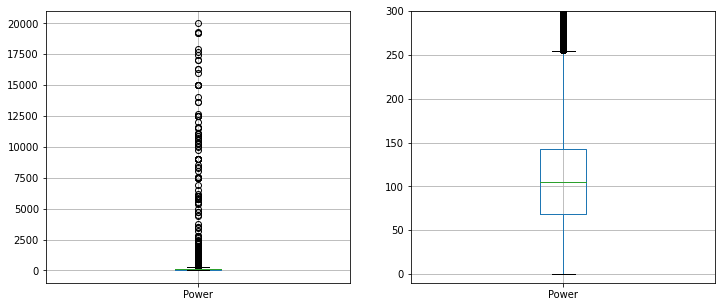

In [15]:
# распределение в столбце Power
fig, axes = plt.subplots(1, 2, figsize = (12,5))

plt.subplot(1,2,1)
data.boxplot(column='Power')

plt.subplot(1,2,2)
data.boxplot(column='Power')
plt.ylim(-10, 300)

plt.show()

In [16]:
power = data['Power'].value_counts().reset_index().sort_values(by='index', ascending=True)
power_df = pd.DataFrame(power)
power_df.rename(columns={'index': 'Power', 'Power': 'Quantity'}, inplace=True)

power_df

,Power,Quantity
0,0,34346
234,1,28
302,2,9
315,3,7
237,4,26
...,...,...
542,17932,1
609,19208,1
505,19211,1
586,19312,1


Имеет смысл поставить ограничения с 50 л.с. до 1200 л.с.

In [17]:
data = data[(data['Power'] >= 50) & (data['Power'] <= 1200)]

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌Верхнюю границу обозначили, но почему именно 270л.с., есть например Porsche, также остались машины с мощностью 0 л.с., лучше ограничить самой маломощной, здесь это Smart.) </div>

<div class="alert alert-info"> <b>Комментарий студента V2:</b> Исправил</div>

**Kilometer**

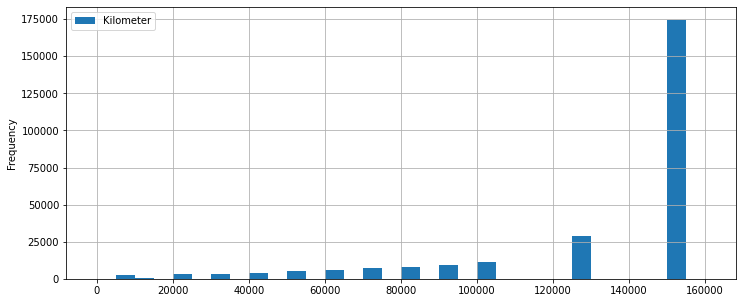

[5000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 125000, 150000]


In [18]:
# распределение в столбце Kilometer
data.plot(kind='hist',
         y='Kilometer',
         range=(0, 160000),
         bins=32,
         figsize=(12, 5),
         grid=True,
         label='Kilometer')
plt.show()

print(sorted(data['Kilometer'].unique()))

Тут ничего странного нет. Да, большинство машин имеют пробег в 125000, 150000 км

**Price**

<AxesSubplot:>

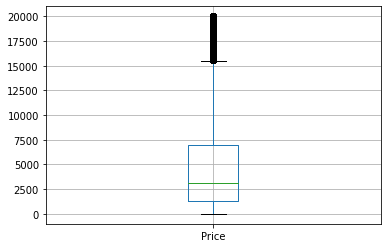

In [19]:
# Проанализируем цену на автомобили
data.boxplot(column='Price')

<AxesSubplot:ylabel='Frequency'>

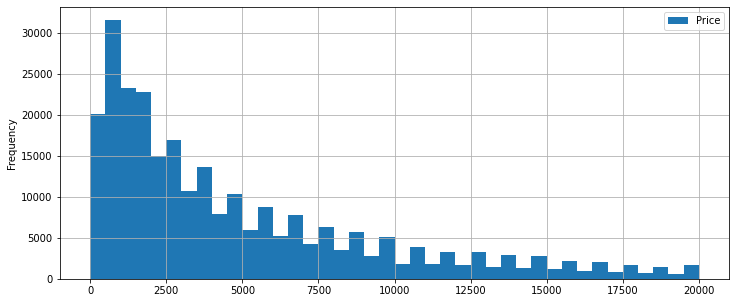

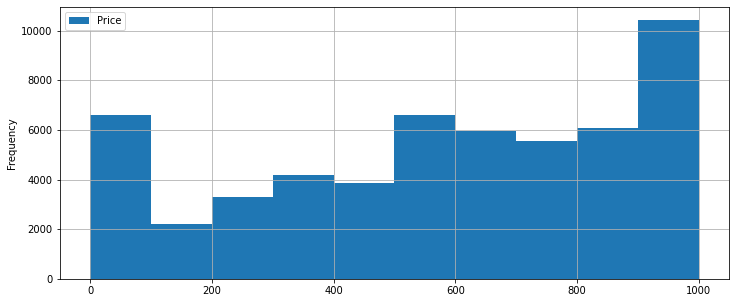

In [20]:
# Распределение в столбце Price
data.plot(kind='hist',
        y='Price',
        bins=40,
        figsize = (12, 5),
        grid=True,
        label='Price')

data.plot(kind='hist',
        y='Price',
        bins=10,
        range = (0, 1000),
        figsize = (12, 5),
        grid=True,
        label='Price')

Можно увидеть, что очень много машин с ценой 0, что не может быть. Имеет смысл ограничить с 900 у.е.

In [21]:
# Удалим выбросы
data = data[data['Price'] > 900]

In [22]:
#код ревьюера
data.describe()

,Power,RegistrationYear,Kilometer,Price
count,218588.000000,218588.000000,218588.000000,218588.000000
mean,128.951891,2004.641618,125677.004227,5733.569025
std,55.755841,5.866832,37912.740764,4606.392864
min,50.000000,1985.000000,5000.000000,901.000000
25%,90.000000,2001.000000,100000.000000,2100.000000
50%,120.000000,2005.000000,150000.000000,4100.000000
75%,150.000000,2008.000000,150000.000000,7999.000000
max,1164.000000,2019.000000,150000.000000,20000.000000


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>  ❌Давай размышлять логичеки, разве машина не может стоитьболее 16 000 у.е., мне кажется вполне, а вот 0 стоимсоть точно не может быть, думаю оптимальная граница от 800 у.е. Можно конечно использовать статистические методы, взять квантили.) </div>

<div class="alert alert-info"> <b>Комментарий студента V2:</b> Исправил</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.2:</b> ✔️Отлично, от выбросов избавилсиь!	👍 </div>

----

#### Пропуски

In [23]:
data.shape

(218588, 10)

In [24]:
data.isna().sum()

Brand                   0
Model                7887
VehicleType         13777
Gearbox              3731
Power                   0
FuelType            12506
RegistrationYear        0
Kilometer               0
NotRepaired         29894
Price                   0
dtype: int64

Как мы видим данные параметры имеют такое количество пропусков:

 - `Model` (модель автомобиля) - 7 887
 - `VehicleType` (тип автомобильного кузова) - 13 777
 - `Gearbox` (тип коробки передач) - 3 731
 - `FuelType` (тип топлива) - 12 506
 - `NotRepaired` (была машина в ремонте или нет) - 29 894

Нужно заполнить или удалить пропуски эти пропуски, т.к. при обучении модели будут возникать ошибки. А также параметр `NotRepaired` для нас важен, поэтому в нём не может быть пропусков

**VehicleType**

In [25]:
# исследуем кузов машины
VehicleType = data['VehicleType'].value_counts()
display(VehicleType)
print(f'Машины класса седан составляют {VehicleType[0]/VehicleType.sum()*100}%')

sedan          59862
wagon          44010
small          41473
bus            21817
convertible    15488
coupe          10990
suv             9423
other           1748
Name: VehicleType, dtype: int64

Машины класса седан составляют 29.227922328390566%


Можно сделать вывод, что машины класса седан больше всего поэтому имеет смысл заполнить пропуски именно им


<div class="alert alert-warning">
<b>Комментарий ревьюера v.2:</b> Если хотел заполнить наиболее часто встречающимся значением вот пример 
    
    data["VehicleType"] = data["VehicleType"].fillna(data["VehicleType"].mode().values[0]) 
</div>

**Gearbox**

In [26]:
# исследуем трансмиссию машины
Gearbox = data['Gearbox'].value_counts()
display(Gearbox)
print(f'Машины на механике составляют {Gearbox[0] / Gearbox.sum()*100}%')

manual    166216
auto       48641
Name: Gearbox, dtype: int64

Машины на механике составляют 77.36122164974843%


И также можно увидеть, что машин на механике в 4 раза больше, чем на автомате.

**FuelType**

In [27]:
# исследуем топливо автомобиля
FuelType = data['FuelType'].value_counts()
display(FuelType)
print(f'В {(FuelType[0]/FuelType.sum()*100).round(2)}% машин ездят на бензине')

petrol      128183
gasoline     73298
lpg           3924
cng            421
hybrid         185
other           41
electric        30
Name: FuelType, dtype: int64

В 62.2% машин ездят на бензине


Пропуски можно заполнить 'petrol'

**NotRepaired**

In [28]:
data = data.replace({'NotRepaired' : { 'yes' : 1, 'no' : 0}})

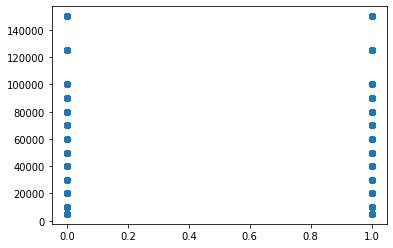

In [29]:
plt.scatter(data['NotRepaired'], data['Kilometer'])

In [30]:
print('Пропусков:', data['NotRepaired'].isna().sum())
NotRepaired = data['NotRepaired'].value_counts()
display(NotRepaired)

print(f'Только {(NotRepaired[1] / NotRepaired.sum()*100).round(2)}% машин были в ремонте')

Пропусков: 29894


0.0    173681
1.0     15013
Name: NotRepaired, dtype: int64

Только 7.96% машин были в ремонте


In [31]:
# Заполним пропуски
data['VehicleType'] = data['VehicleType'].fillna('sedan')
data['Gearbox'] = data['Gearbox'].fillna('manual')
data['FuelType'] = data['FuelType'].fillna('petrol')

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️Вот тут необходимо обосновать, раскрыть мысль почему удаляем, а не пытаемся восстановить. У нас есть несколько вариантов заполнить пропуски, удалить, заполнить неизвестной(unknown) или попробовать восстановить каким-либо способом, например наиболее часто встречающимся значением, т.к. not_repeared бинарный признак, можно воспользоваться следующей логикой условно до 100 000 км не ремонтировалась более ремонтировалась, чтоб определиться с порогом, мы или пользуемся опытом или сторонними источниками или строим гравики по текущей выборке. При переборе стратегии или останавливаемся на лучшей метрике, если уверен, что в этом нет смысла, то необходимо чётко аргументироватьту или иную стратегию. Процесс творческий.)</div>


<div class="alert alert-info">
<h2> Комментарий студента V2<a class="tocSkip"></h2>
<hr>  
    Я не разобрался как заполнять по условию. Пытался так:
    
</div>
    
`data[data['Kilometer'] >= 100000].NotRepaired = data[data['Kilometer'] >= 100000].NotRepaired.fillna(1)`



<div class="alert alert-warning">
<b>Комментарий ревьюера v.2:</b> Пример ниже. </div>

In [32]:
# код ревьюера заполнение пропусков с ремонтами, 'yes' свыше 100 000 км пробега
data.loc[data['NotRepaired'].isna(), 'NotRepaired'] = data.loc[data['NotRepaired'].isna(), 'NotRepaired'] \
    .apply(lambda x: 'no' if x > 1000000 else 'yes')

<div class="alert alert-info"> <b>Комментарий студента V3:</b> Разобрался, спасибо</div>


<div class="alert alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️Отлично!)</div>

In [33]:
# удалим оставшие пропуски в столбце model и проверим
data = data.dropna()
data.isna().sum()

Brand               0
Model               0
VehicleType         0
Gearbox             0
Power               0
FuelType            0
RegistrationYear    0
Kilometer           0
NotRepaired         0
Price               0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210701 entries, 2 to 354368
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Brand             210701 non-null  object
 1   Model             210701 non-null  object
 2   VehicleType       210701 non-null  object
 3   Gearbox           210701 non-null  object
 4   Power             210701 non-null  int64 
 5   FuelType          210701 non-null  object
 6   RegistrationYear  210701 non-null  int64 
 7   Kilometer         210701 non-null  int64 
 8   NotRepaired       210701 non-null  object
 9   Price             210701 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 17.7+ MB


---

Получение дамми-признаков

In [35]:
data = pd.get_dummies(data, drop_first=True)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210701 entries, 2 to 354368
Columns: 304 entries, Power to NotRepaired_yes
dtypes: int64(4), uint8(300)
memory usage: 68.3 MB


**Вывод**<br>
- Проанализировал данные и удалил дубликаты.
- Создал таблицу с нужными для нас признаками 
- Очистили от выбросов параметры *Price* и *Power*
- Получил дамми-признаки

## Обучение моделей

Разобьём на выборки

In [37]:
features = data.drop(['Price'], axis=1)
target = data['Price']

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

print(features_train.shape)
print(features_valid.shape)
print(target_train.shape)
print(target_valid.shape)

(158025, 303)
(52676, 303)
(158025,)
(52676,)


In [38]:
# создадим списки для rsme, время обучения, время предсказания
rmse_list = []
learning_time = []
predict_time = []

### Линейная регрессия

In [39]:
model_lr = LinearRegression()

In [40]:
%%time
start = time.time()
model_lr.fit(features_train, target_train)
end = time.time()
linear_time = end - start

learning_time.append(linear_time)

CPU times: user 9.78 s, sys: 6.96 s, total: 16.7 s
Wall time: 16.7 s


In [41]:
# Предсказание
start = time.time()
predict_valid = model_lr.predict(features_valid)
end = time.time()

predict = end - start
rmse = mean_squared_error(target_valid, predict_valid)**0.5

predict_time.append(predict)
rmse_list.append(rmse)

print(predict_time)
print(rmse)

[0.22308826446533203]
2594.2136815064023


### LightGBM

In [42]:
GBM_model = lgb.LGBMRegressor(random_state=12345)

In [43]:
%%time

start = time.time()
GBM_model.fit(features_train, target_train, eval_set=[(features_train, target_train),], eval_metric=["rmse"])
end = time.time()
linear_time = end - start

learning_time.append(linear_time)

[1]	training's rmse: 4291.94	training's l2: 1.84207e+07
[2]	training's rmse: 4008.76	training's l2: 1.60702e+07
[3]	training's rmse: 3760.67	training's l2: 1.41426e+07
[4]	training's rmse: 3537.96	training's l2: 1.25172e+07
[5]	training's rmse: 3344.59	training's l2: 1.11863e+07
[6]	training's rmse: 3176.51	training's l2: 1.00902e+07
[7]	training's rmse: 3029.25	training's l2: 9.17633e+06
[8]	training's rmse: 2901.02	training's l2: 8.41592e+06
[9]	training's rmse: 2787.06	training's l2: 7.76768e+06
[10]	training's rmse: 2689.74	training's l2: 7.23473e+06
[11]	training's rmse: 2602.88	training's l2: 6.77501e+06
[12]	training's rmse: 2521.58	training's l2: 6.35839e+06
[13]	training's rmse: 2454.97	training's l2: 6.02689e+06
[14]	training's rmse: 2391.65	training's l2: 5.72001e+06
[15]	training's rmse: 2337.28	training's l2: 5.46288e+06
[16]	training's rmse: 2284.63	training's l2: 5.21953e+06
[17]	training's rmse: 2237.61	training's l2: 5.00688e+06
[18]	training's rmse: 2197.07	training's

Можно сделать вывод, что модель LightGBM обучилась лучше.


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⚠️Можно сделатьтакой вывод, но сначала нужно протестировать модель на тестовой выборке.)</div>

<div class="alert alert-info"> <b>Комментарий студента V2:</b> Протестировал</div>


<div class="alert alert-warning">
<b>Комментарий ревьюера v.2:</b> Сначала обучаем все модели, потом тестируем, далее собираем все в одну таблицу и анализаруем, выборку необходимо переименовать это target по идеии, а не valid.</div>

In [44]:
# Предсказание
start = time.time()
predict_valid = GBM_model.predict(features_valid)
end = time.time()

predict = end - start
rmse = mean_squared_error(target_valid, predict_valid)**0.5

predict_time.append(predict)
rmse_list.append(rmse)

print(predict_time)
print(rmse)

[0.22308826446533203, 0.6192207336425781]
1692.6421988554623


---

## Анализ моделей

<div class="alert alert-info">
<h2> Комментарий студента V2<a class="tocSkip"></h2>
<hr>  
    Ниже, пошли мои попытки разобраться с GridSearchCV, но ничего не получается. Когда я запускаю .fit(), то модель обучается <b>очень</b> долго
    </div>


<div class="alert alert-warning">
<b>Комментарий ревьюера v.2:</b> То что долго считает, это нормально,можешьили поставитьна ночьи сделать локально. </div>

Изменим модель градиентного бустинга с помощью GridSearchCV

    %%time

    params = {
        'max_depth': [-1, 3, 6],
        'n_estimators': [50, 100, 200, 500],
    }

    grid = GridSearchCV(GBM_model, params, scoring='neg_mean_squared_error', cv=5)
    grid.fit(features_train, target_train)

    grid.best_params_

    CPU times: user 1h 12min 43s, sys: 32.5 s, total: 1h 13min 16s
    Wall time: 1h 13min 53s
    {'max_depth': -1, 'n_estimators': 500}

Делаем вывод, что лучшие параметр это 500 и меняем модель

In [45]:
GBM_model = lgb.LGBMRegressor(random_state=12345, n_estimators=500)

In [46]:
%%time

start = time.time()
GBM_model.fit(features_train, target_train, eval_set=[(features_train, target_train),], eval_metric=["rmse"])
end = time.time()
linear_time = end - start

learning_time.append(linear_time)

[1]	training's rmse: 4291.94	training's l2: 1.84207e+07
[2]	training's rmse: 4008.76	training's l2: 1.60702e+07
[3]	training's rmse: 3760.67	training's l2: 1.41426e+07
[4]	training's rmse: 3537.96	training's l2: 1.25172e+07
[5]	training's rmse: 3344.59	training's l2: 1.11863e+07
[6]	training's rmse: 3176.51	training's l2: 1.00902e+07
[7]	training's rmse: 3029.25	training's l2: 9.17633e+06
[8]	training's rmse: 2901.02	training's l2: 8.41592e+06
[9]	training's rmse: 2787.06	training's l2: 7.76768e+06
[10]	training's rmse: 2689.74	training's l2: 7.23473e+06
[11]	training's rmse: 2602.88	training's l2: 6.77501e+06
[12]	training's rmse: 2521.58	training's l2: 6.35839e+06
[13]	training's rmse: 2454.97	training's l2: 6.02689e+06
[14]	training's rmse: 2391.65	training's l2: 5.72001e+06
[15]	training's rmse: 2337.28	training's l2: 5.46288e+06
[16]	training's rmse: 2284.63	training's l2: 5.21953e+06
[17]	training's rmse: 2237.61	training's l2: 5.00688e+06
[18]	training's rmse: 2197.07	training's

In [47]:
# Предсказание
start = time.time()
predict_valid = GBM_model.predict(features_valid)
end = time.time()

predict = end - start
rmse = mean_squared_error(target_valid, predict_valid)**0.5

predict_time.append(predict)
rmse_list.append(rmse)

print(predict_time)
print(rmse)

[0.22308826446533203, 0.6192207336425781, 1.9992282390594482]
1600.0509997065858


Итак, посмотрим на таблицу метрики и времён:

In [48]:
pd.DataFrame(data=[rmse_list, learning_time, predict_time], columns=['LinearRegression', 'LGBMRegressor', 'LGBMRegressor_upgrade'], index=['RMSE', 'Learning Time', 'Predicting Time'])

,LinearRegression,LGBMRegressor,LGBMRegressor_upgrade
RMSE,2594.213682,1692.642199,1600.051000
Learning Time,16.718917,332.177194,1603.015618
Predicting Time,0.223088,0.619221,1.999228


**Вывод:**

Можно сделать вывод, что хоть и модель `LGBMRegressor_upgrade` обучалась намного дольше, но результат лучше, её и будем рекомендовать заказчику.

<div class="alert alert-info">
<h2> Комментарий студента<a class="tocSkip"></h2>
<hr>  
   Очень слабо разобрался в теме. Посоветуй, что поможет мне лучше понять. Где почитать или посмотреть поподробнее.
</div>


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Георгий, сделано уже много. Спасибо тебе. Необходимо ещё потрудится, т.к. как самты говоришь много моментов не понятных, давай работать в режиме диалога.
    
- В предобработке нужно определится, какие признаки нам важны, мы всегда должны руководствоваться логикой и теме методами,которые изучили. В начале можно было сделать таблицу с корреляцией и увидеть, что там "бардак", который свидетельствует о том, что есть аномалии и пропуски, которые влияют на адекватность корреляции. Вот если мы так сделаем после обработки аномалий, то увидим, что возраст машины влияет на стоимость.
- Комментарий по пропускам  оставил.
- Аномалии необходимо обработаь они будут влиять на качество метрики. Тут мы или смотрим на рапределения и boxplot или используем опыт или сторонние еисточники информации(всемирная сеть например).
- Что касается модели, нам нужно перебрать несколько гиперпараметров, чтоб найти оптимальные , можно топорно в ручную, можно циклом,  а можно использовать алгоритмы подбора, например GridSearch или Random Search. https://medium.com/@senapati.dipak97/grid-search-vs-random-search-d34c92946318(это описание принципа работы их ), а это пример кода https://medium.com/@cjl2fv/an-intro-to-hyper-parameter-optimization-using-grid-search-and-random-search-d73b9834ca0a  
- Далее на лучших гиперпараметрах произвести тестирование модели, собрать данные в одну таблицу и сделать финальный вывод, не вот так можно собрать данные в одну таблицу https://www.geeksforgeeks.org/creating-a-pandas-series/. 

Надеюс эти рекомендации тебе помогут. Также жду твоих правко и ещё вопросов.</div>


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> ✔️Георгий, ты на верном пути многое уже сделано осталось доучить протестировать модели и подвести итог, должны справится за одну итерацию. Можешьпросто перебратьнесколько парамеров или подобрать в ручную или циклом.

<div class="alert alert-success">
<b>Комментарий ревьюера v.3:</b> ✔️Георгий, ты хорошо поработал. Надеюсь я чуть помог тебе разобраться в теме.) Проект принят, если остались вопросы, можешь задать их через своего куратора. Удачи!) Пару наблюдений, вывод должен содеражть рекомендацию заказчика, это условие задания и не называй тестовую выборку valid, так можно запутаться.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей

The end
